<a href="https://colab.research.google.com/github/mahaqj/Machine-Learning-Assignment-2/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Robotics: Assignment 2
## By Maha Qaiser 22i-2348

In [38]:
print('''
derivation:

mse = 1/n Σ (y_pred - y_actual)² where n = number of data points or rows or records lol

for weight (w₁):
  ∂mse/∂w₁ = 1/n Σ ((w₀ + w₁x) - y_actual)² where y_pred = w₀ + w₁x
  ∂mse/∂w₁ = 2 * 1/n Σ (w₀ + w₁x - y_actual) * x . ∂/∂w₁ (w₀ + w₁x - y_actual)
  ∂mse/∂w₁ = 2/n Σ ((w₀ + w₁x - y_actual) * x)

for bias (w₀):
  ∂mse/∂w₀ = 1/n Σ ((w₀ + w₁x) - y_actual)² where y_pred = w₀ + w₁x
  ∂mse/∂w₀ = 2 * 1/n Σ (w₀ + w₁x - y_actual) . ∂/∂w₀ (w₀ + w₁x - y_actual)
  ∂mse/∂w₀ = 2 * 1/n Σ ((w₀ + w₁x - y_actual) * 1)
  ∂mse/∂w₀ = 2/n Σ (w₀ + w₁x - y_actual)
''')


derivation:

mse = 1/n Σ (y_pred - y_actual)² where n = number of data points or rows or records lol

for weight (w₁):
  ∂mse/∂w₁ = 1/n Σ ((w₀ + w₁x) - y_actual)² where y_pred = w₀ + w₁x
  ∂mse/∂w₁ = 2 * 1/n Σ (w₀ + w₁x - y_actual) * x . ∂/∂w₁ (w₀ + w₁x - y_actual)
  ∂mse/∂w₁ = 2/n Σ ((w₀ + w₁x - y_actual) * x)

for bias (w₀):
  ∂mse/∂w₀ = 1/n Σ ((w₀ + w₁x) - y_actual)² where y_pred = w₀ + w₁x
  ∂mse/∂w₀ = 2 * 1/n Σ (w₀ + w₁x - y_actual) . ∂/∂w₀ (w₀ + w₁x - y_actual)
  ∂mse/∂w₀ = 2 * 1/n Σ ((w₀ + w₁x - y_actual) * 1)
  ∂mse/∂w₀ = 2/n Σ (w₀ + w₁x - y_actual)



In [39]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import kagglehub
import pandas as pd

In [40]:
'''step 1: write a python function to implement sgd for linear regression'''
def sgd(X, y, lr, epochs):
  w1 = 0 #weight
  w0 = 0 #bias
  n = len(X)
  losses = [] #to store loss values for plotting

  for epoch in range(epochs):
    for iteration in range(n):
      Xi = X.iloc[iteration]
      yi = y.iloc[iteration]

      #calculate y_pred
      y_pred = w0 + w1*Xi

      w1_gradient = 2 * (y_pred - yi) * Xi #∂mse/∂w₁
      w0_gradient = 2 * (y_pred - yi) #∂mse/∂w₀

      #update weight and bias
      w1 = w1 - lr * w1_gradient #w₁new = w₁old - lr(∂mse/∂w₁)
      w0 = w0 - lr * w0_gradient #w₀new = w₀old - lr(∂mse/∂w₁)

    #calculate and store loss
    loss = np.mean((y - (w0 + w1*X))**2)
    losses.append(loss)

    if epoch % 10 == 0:
      print(f"at epoch {epoch}, loss: {loss}, weight (w1): {w1}, bias (w0): {w0}")

  return w1, w0, losses

In [41]:
'''step 2: implement batch gradient descent'''
def batch(X, y, lr, epochs):
  w1 = 0 #weight
  w0 = 0 #bias
  n = len(X)
  losses = [] #to store loss values for plotting

  for epoch in range(epochs):
    #calculate gradients for the entire dataset
    y_pred = w0 + w1*X
    w1_gradient = (2/n) * np.sum((y_pred - y) * X) #∂mse/∂w₁
    w0_gradient = (2/n) * np.sum(y_pred - y) #∂mse/∂w₀

    #update weight and bias
    w1 = w1 - lr * w1_gradient #w₁new = w₁old - lr(∂mse/∂w₁)
    w0 = w0 - lr * w0_gradient #w₀new = w₀old - lr(∂mse/∂w₀)

    #calculate and store loss
    loss = np.mean((y - (w0 + w1*X))**2)
    losses.append(loss)

    if epoch % 10 == 0:
      print(f"at epoch {epoch}, loss: {loss}, weight (w1): {w1}, bias (w0): {w0}")

  return w1, w0, losses

In [42]:
'''step 3: implement mini-batch gradient descent'''
def mini_batch(X, y, lr, epochs, batch_size=32):
  w1 = 0 #weight
  w0 = 0 #bias
  n = len(X)
  losses = [] #to store loss values for plotting

  for epoch in range(epochs):
    #shuffle data
    indices = np.random.permutation(n)
    X_shuffled = X.iloc[indices]
    y_shuffled = y.iloc[indices]

    for i in range(0, n, batch_size):
      #get mini-batch
      X_batch = X_shuffled[i:i+batch_size]
      y_batch = y_shuffled[i:i+batch_size]

      #calculate gradients for the mini-batch
      y_pred = w0 + w1*X_batch
      w1_gradient = (2/batch_size) * np.sum((y_pred - y_batch) * X_batch) #∂mse/∂w₁
      w0_gradient = (2/batch_size) * np.sum(y_pred - y_batch) #∂mse/∂w₀

      #update weight and bias
      w1 = w1 - lr * w1_gradient #w₁new = w₁old - lr(∂mse/∂w₁)
      w0 = w0 - lr * w0_gradient #w₀new = w₀old - lr(∂mse/∂w₀)

    #calculate and store loss
    loss = np.mean((y - (w0 + w1*X))**2)
    losses.append(loss)

    if epoch % 10 == 0:
      print(f"at epoch {epoch}, loss: {loss}, weight (w1): {w1}, bias (w0): {w0}")

  return w1, w0, losses

In [43]:
'''step 4: implement sgd with momentum'''
def sgd_with_momentum(X, y, lr, epochs, momentum=0.9):
  w1 = 0 #weight
  w0 = 0 #bias
  n = len(X)
  v_w1, v_w0 = 0, 0 #momentum terms
  losses = [] #to store loss values for plotting

  for epoch in range(epochs):
    for iteration in range(n):
      Xi = X.iloc[iteration]
      yi = y.iloc[iteration]

      #calculate y_pred
      y_pred = w0 + w1*Xi

      #compute gradients
      w1_gradient = 2 * (y_pred - yi) * Xi #∂mse/∂w₁
      w0_gradient = 2 * (y_pred - yi) #∂mse/∂w₀

      #update momentum terms
      v_w1 = momentum * v_w1 - lr * w1_gradient
      v_w0 = momentum * v_w0 - lr * w0_gradient

      #update weight and bias
      w1 += v_w1
      w0 += v_w0

    #calculate and store loss
    loss = np.mean((y - (w0 + w1*X))**2)
    losses.append(loss)

    if epoch % 10 == 0:
      print(f"at epoch {epoch}, loss: {loss}, weight (w1): {w1}, bias (w0): {w0}")

  return w1, w0, losses

In [44]:
'''step 5: load dataset and split into train/test'''
path = kagglehub.dataset_download("codebreaker619/salary-data-with-age-and-experience")
print("path to dataset: ", path)
dataset = pd.read_csv(path + "/Salary_Data.csv") #load the data

X = dataset['Age'] #1 feature
y = dataset['Salary'] #1 target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splitting the data 80-20

path to dataset:  /root/.cache/kagglehub/datasets/codebreaker619/salary-data-with-age-and-experience/versions/1


In [45]:
'''step 6: train models using sgd, batch, and mini-batch gradient descent'''
print('\ntraining model with stochastic gradient descent\n')
w_sgd, b_sgd, sgd_losses = sgd(X_train, y_train, lr=0.000001, epochs=201)

print('\ntraining model with batch gradient descent\n')
w_batch, b_batch, batch_losses = batch(X_train, y_train, lr=0.000001, epochs=201)

print('\ntraining model with mini-batch gradient descent\n')
w_mini, b_mini, mini_losses = mini_batch(X_train, y_train, lr=0.000001, epochs=201, batch_size=32)

print('\ntraining model with stochastic gradient descent + momentum\n')
w_momentum, b_momentum, momentum_losses = sgd_with_momentum(X_train, y_train, lr=0.000001, epochs=201, momentum=0.9)


training model with stochastic gradient descent

at epoch 0, loss: 5842737715.135367, weight (w1): 101.38095341543811, bias (w0): 3.49907404143739
at epoch 10, loss: 2913062930.5868697, weight (w1): 935.2793549167908, bias (w0): 32.0762540350613
at epoch 20, loss: 1501966371.8650293, weight (w1): 1514.0624065602203, bias (w0): 51.558960992441115
at epoch 30, loss: 822335796.3224788, weight (w1): 1915.78162826931, bias (w0): 64.7296184452109
at epoch 40, loss: 495025844.00332266, weight (w1): 2194.6089898652385, bias (w0): 73.5193785826584
at epoch 50, loss: 337408612.6315474, weight (w1): 2388.1427638375226, bias (w0): 79.26856531151716
at epoch 60, loss: 261517578.23587787, weight (w1): 2522.47818170279, bias (w0): 82.90743580409438
at epoch 70, loss: 224983395.12994465, weight (w1): 2615.726743347008, bias (w0): 85.081638774288
at epoch 80, loss: 207399819.9357663, weight (w1): 2680.4588077612684, bias (w0): 86.23928929622906
at epoch 90, loss: 198939394.89975724, weight (w1): 2725.

final parameters:
sgd: w = 2825.8715601718786, b = 77.62510650192328
batch: w = 744.71172019074, b = 25.58853011252405
mini-batch: w = 579.2124194191807, b = 19.92864443655523
sgd with momentum: w = 2835.5138207731197, b = -130.38852084060008


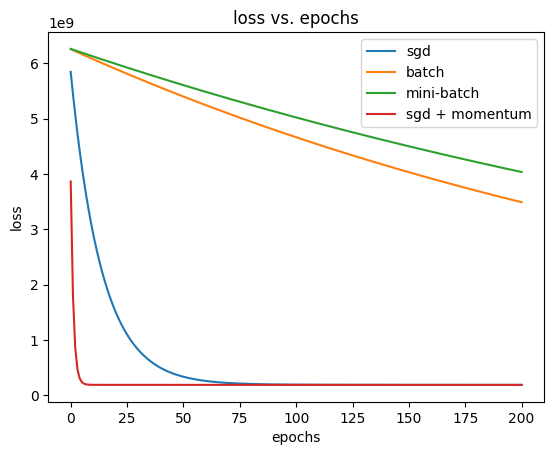

In [46]:
'''step 7: compare convergence speed and final model parameters'''
print("final parameters:")
print(f"sgd: w = {w_sgd}, b = {b_sgd}")
print(f"batch: w = {w_batch}, b = {b_batch}")
print(f"mini-batch: w = {w_mini}, b = {b_mini}")
print(f"sgd with momentum: w = {w_momentum}, b = {b_momentum}")

plt.plot(range(201), sgd_losses, label="sgd")
plt.plot(range(201), batch_losses, label="batch")
plt.plot(range(201), mini_losses, label="mini-batch")
plt.plot(range(201), momentum_losses, label="sgd + momentum")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss vs. epochs")
plt.legend()
plt.show()

at epoch 0, loss: 5842737715.135367, weight (w1): 101.38095341543811, bias (w0): 3.49907404143739
at epoch 10, loss: 2913062930.5868697, weight (w1): 935.2793549167908, bias (w0): 32.0762540350613
at epoch 20, loss: 1501966371.8650293, weight (w1): 1514.0624065602203, bias (w0): 51.558960992441115
at epoch 30, loss: 822335796.3224788, weight (w1): 1915.78162826931, bias (w0): 64.7296184452109
at epoch 40, loss: 495025844.00332266, weight (w1): 2194.6089898652385, bias (w0): 73.5193785826584
at epoch 50, loss: 337408612.6315474, weight (w1): 2388.1427638375226, bias (w0): 79.26856531151716
at epoch 60, loss: 261517578.23587787, weight (w1): 2522.47818170279, bias (w0): 82.90743580409438
at epoch 70, loss: 224983395.12994465, weight (w1): 2615.726743347008, bias (w0): 85.081638774288
at epoch 80, loss: 207399819.9357663, weight (w1): 2680.4588077612684, bias (w0): 86.23928929622906
at epoch 90, loss: 198939394.89975724, weight (w1): 2725.3988829189348, bias (w0): 86.69140343069729

^ lea

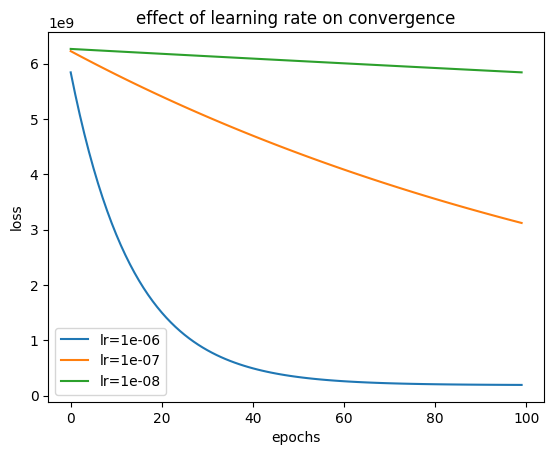

at epoch 0, loss: 5468563383.701561, weight (w1): 193.1345637222917, bias (w0): 6.632620875487316
at epoch 10, loss: 1407384977.6864216, weight (w1): 1562.2983305942728, bias (w0): 53.145572182609506
at epoch 20, loss: 471126240.14566773, weight (w1): 2219.9696905971787, bias (w0): 74.2913765082843
at epoch 30, loss: 255443338.34538817, weight (w1): 2535.9011598604193, bias (w0): 83.25302075511199
at epoch 40, loss: 205831141.43954107, weight (w1): 2687.6901136894917, bias (w0): 86.3624804207557
at epoch 50, loss: 194451350.92550066, weight (w1): 2760.639089050271, bias (w0): 86.66109309698216
at epoch 60, loss: 191853230.9801669, weight (w1): 2795.720103689658, bias (w0): 85.60965634152814
at epoch 70, loss: 191262512.72223994, weight (w1): 2812.612598547672, bias (w0): 83.90981192817338
at epoch 80, loss: 191125998.63670385, weight (w1): 2820.76888808209, bias (w0): 81.89856834592945
at epoch 90, loss: 191089992.5307832, weight (w1): 2824.729052922291, bias (w0): 79.73779554812104
at

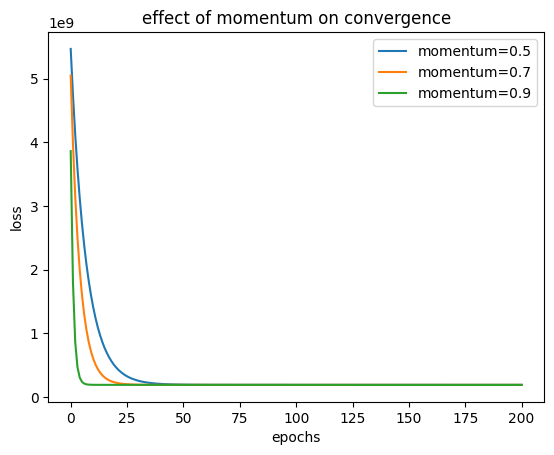

at epoch 0, loss: 3862868077.83704, weight (w1): 629.9693942780228, bias (w0): 21.565580759759474
at epoch 10, loss: 191655616.31944665, weight (w1): 2800.36137672782, bias (w0): 87.39558495236625
at epoch 20, loss: 191071888.34300515, weight (w1): 2827.802919534435, bias (w0): 76.82782596848257
at epoch 30, loss: 191017117.1975012, weight (w1): 2828.536826617924, bias (w0): 65.31015016488792
at epoch 40, loss: 190961961.2227986, weight (w1): 2828.951424301386, bias (w0): 53.783042388430225
at epoch 50, loss: 190906818.08700418, weight (w1): 2829.3621367334963, bias (w0): 42.257744089415404
at epoch 60, loss: 190851693.49678895, weight (w1): 2829.772734244114, bias (w0): 30.734389314386885
at epoch 70, loss: 190796587.51427844, weight (w1): 2830.183261912186, bias (w0): 19.212979341263267
at epoch 80, loss: 190741500.1340088, weight (w1): 2830.593720288104, bias (w0): 7.693513861012257
at epoch 90, loss: 190686431.3497107, weight (w1): 2831.004109390005, bias (w0): -3.8240074543130156


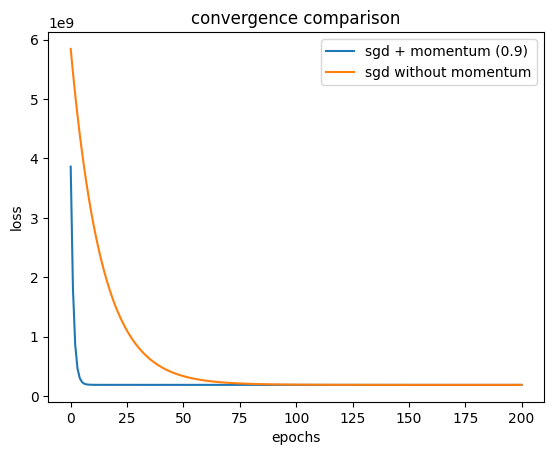

In [37]:
'''step 8: train with different learning rates and momentum values'''
#training with different learning rate values
learning_rates = [0.000001, 0.0000001, 0.00000001]
for lr in learning_rates:
  w, b, losses = sgd(X_train, y_train, lr=lr, epochs=100)
  print(f"\n^ learning rate: {lr}, weight: {w}, bias: {b}\n")
  plt.plot(range(100), losses, label=f"lr={lr}")

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("effect of learning rate on convergence")
plt.legend()
plt.show()

#training with different momentum values
momentum_values = [0.5, 0.7, 0.9]
for momentum in momentum_values:
  w, b, losses = sgd_with_momentum(X_train, y_train, lr=0.000001, epochs=201, momentum=momentum)
  print(f"\n^ momentum: {momentum}, weight: {w}, bias: {b}\n")
  plt.plot(range(201), losses, label=f"momentum={momentum}")

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("effect of momentum on convergence")
plt.legend()
plt.show()

#training with momentum
w_momentum, b_momentum, momentum_losses = sgd_with_momentum(X_train, y_train, lr=0.000001, epochs=201, momentum=0.9)
print("\n^ sgd with momentum: w =", w_momentum, "b =", b_momentum, "\n")

#training without momentum
w_no_momentum, b_no_momentum, no_momentum_losses = sgd(X_train, y_train, lr=0.000001, epochs=201)
print("\n^ sgd without momentum: w =", w_no_momentum, "b =", b_no_momentum, "\n")

#loss comparison for with and without momentum
plt.plot(range(201), momentum_losses, label="sgd + momentum (0.9)")
plt.plot(range(201), no_momentum_losses, label="sgd without momentum")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("convergence comparison")
plt.legend()
plt.show()